In [1]:
!pip install gdown pdf2image python-docx jiwer evaluate
!apt-get install poppler-utils
!pip install -q transformers datasets torch pillow
!mkdir train
!mkdir img

# !pip install --upgrade accelerate transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspe

In [2]:
from IPython.display import display
from PIL import Image
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
import cv2
from re import split
from docx import Document
import cv2
import albumentations as A
from albumentations.core.transforms_interface import ImageOnlyTransform
import glob
from PIL import Image
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from transformers import TrOCRProcessor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import VisionEncoderDecoderModel, TrOCRProcessor

from transformers import AutoTokenizer
from evaluate import load

In [3]:
import numpy as np
import math
np.math = math

In [4]:
!gdown --folder https://drive.google.com/drive/folders/1DsTxp2JZh-Hmto2N0zr9ns0KPYT8LTQE
!gdown --folder https://drive.google.com/drive/folders/1t7mqUurnBsvHuZ_mHytrV2osM_UFyxt3
!gdown https://drive.google.com/uc?id=1CQJSJDBdzlGxykTzttIPJirSXXXnYpyy

Retrieving folder contents
Retrieving folder 1za1cRH464l5pURr7NXxWHh0a7jPSsy0h Test sources
Processing file 1tZUFkkrPjzqrde6Q5cnzGR8UhBL5ww-X Buendia - Instruccion.pdf
Processing file 10rsXoAMnpvVpWi9ufaZSOux6rZpQ1YZO Constituciones sinodales Calahorra 1602.pdf
Processing file 1SNWXeyXQ9UVo5Bc3Sxdb2eRtoEAzbHnm Ezcaray - Vozes.pdf
Processing file 1hX9g-Ru_VnO2UzWxQGX0tH_JpBrDzScZ Mendo - Principe perfecto.pdf
Processing file 1sNi5plP2Rc9H2bodYb11NEg4NNlZXIAX Paredes - Reglas generales.pdf
Processing file 1m8texvxxMAuf7gZB2654dVyh8dKDkA1q PORCONES.228.35 – 1636.pdf
Retrieving folder 1XHTtchwU-Y-ZFc7HoyFyGqxPESm8AV31 Test transcriptions
Processing file 1J1efNxScogDBGfh90t3hmI9IFAbwyX9R Buendia transcription.docx
Processing file 1bz1aY-560OJNkUKjqUEnlHxmSTC-wW-Y Constituciones sinodales transcription.docx
Processing file 1nKVj6ziuCpfmP_sj197B0xcVumCfMdQf Ezcaray transcription.docx
Processing file 1_6ZdbUZw-H9nFRb2GDsKQEu2E4cXDIf0 Mendo transcription.docx
Processing file 1dfjS0dmKm7xzGyPoFd

In [5]:
!sudo apt-get install p7zip-full
!7z x /content/train.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 277954089 bytes (266 MiB)

Extracting archive: /content/train.zip
--
Path = /content/train.zip
Type = zip
Physical Size = 277954089

  0%     10% 385 - train/Admission.png                               21% 656 - train/AIIMS.png                           30% 882 - train/ELECTRONICS.png                              

Converting given pdfs into images

In [6]:
def convert_pdf_to_images(it, pdf_path, dpi=150):
  images = convert_from_path(pdf_path, dpi=dpi, thread_count=4)
  for i, image in enumerate(images):
    image.save(f'/content/img/{it}.{i+1}.png')

  return "DONE"

In [7]:
pdf_path1 = '/content/humanai-task/Test sources/Buendia - Instruccion.pdf'
pdf_path2 = '/content/humanai-task/Test sources/Constituciones sinodales Calahorra 1602.pdf'
pdf_path3 = '/content/humanai-task/Test sources/Ezcaray - Vozes.pdf'
pdf_path4 = '/content/humanai-task/Test sources/Mendo - Principe perfecto.pdf'
pdf_path5 = '/content/humanai-task/Test sources/PORCONES.228.35 – 1636.pdf'
pdf_path6 = '/content/humanai-task/Test sources/Paredes - Reglas generales.pdf'

convert_pdf_to_images(1, pdf_path1)
# convert_pdf_to_images(2, pdf_path2)
# convert_pdf_to_images(3, pdf_path3)
# convert_pdf_to_images(4, pdf_path4)
# convert_pdf_to_images(5, pdf_path5)
# convert_pdf_to_images(6, pdf_path6)

'DONE'

Augementing all images in train folder

In [8]:
transform = A.Compose([
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
])

# image = cv2.imread("/content/train/assi.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

folder_path = '/content/train'
image_files = glob.glob(folder_path + '/*.*g')  # Matches .jpg, .jpeg, .png

for file_path in image_files:
    image = cv2.imread(file_path)
    # print(f"Processing {file_path.split('/')[-1].split('.')[0]}")

    augmented_images = [transform(image=image)["image"] for _ in range(1)]
    for i, img in enumerate(augmented_images):
        cv2.imwrite(f"/content/train/{file_path.split('/')[-1].split('.')[0]}_{i}.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))


Creating custom dataset class


In [9]:
class SpanishOCRDataset(Dataset):
    def __init__(self, image_paths, texts):
        self.image_paths = image_paths
        self.texts = texts
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, i):
        image = Image.open(self.image_paths[i])
        text = self.texts[i]

        if self.processor:
            encoding = self.processor(image, text, return_tensors="pt", padding="max_length", truncation=True)
            for k,v in encoding.items():
                encoding[k] = v.squeeze()
            return encoding

        return {"image": image, "text": text}


In [10]:
def preprocess_images(image_paths):
    preprocessed_images = []
    image_files = glob.glob(image_paths + '/*.*g')
    for img_path in image_files:
        image = cv2.imread(img_path)

        denoised = cv2.medianBlur(image, 3)
        preprocessed_path = img_path.replace('.png', '_preprocessed.png')
        cv2.imwrite(preprocessed_path, denoised)
        preprocessed_images.append(preprocessed_path)

    return preprocessed_images


Using pretrained transformer for fine tuning


In [11]:
from transformers import VisionEncoderDecoderModel, TrOCRProcessor, Seq2SeqTrainer, Seq2SeqTrainingArguments

model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-base-spanish")
processor = TrOCRProcessor.from_pretrained("qantev/trocr-base-spanish")
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.93k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [12]:
folder_path = "/content/train"
img_pth = []
txt = []
preprocess_images(folder_path)

image_files = glob.glob(folder_path + '/*.*g')
for file_path in image_files:
    img_pth.append(file_path)
    txt.append(file_path.split('/')[-1].split('.')[0].split('_')[0])

dataset = SpanishOCRDataset(image_paths=img_pth, texts=txt)


sample = dataset[0]
print(f"Image Path: {dataset.image_paths[0]}")
print(f"Text: {dataset.texts[0]}")

Image Path: /content/train/BIG_0.png
Text: BIG


In [13]:
# folder_path = "/content/train"


image_files = glob.glob(folder_path + '/*.*g')
for file_path in image_files:
  img = (np.array(cv2.imread(file_path)))
  image = Image.fromarray(img)
  iter = image.convert("RGB")
  img = np.array(iter)
  cv2.imwrite(file_path, img)

In [14]:
def create_data_splits(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-5, "Ratios must sum to 1"

    dataset_size = len(dataset)
    train_size = int(train_ratio * dataset_size)
    val_size = int(val_ratio * dataset_size)
    test_size = dataset_size - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )

    return train_dataset, val_dataset, test_dataset
train_dataset, val_dataset, test_dataset = create_data_splits(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)

In [15]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=True,
    report_to=["none"],

)


# Load the CER metric
cer_metric = load("cer")

def compute_metrics(eval_pred):
    # predictions, labels = eval_pred
    predictions = eval_pred.predictions
    labels = eval_pred.label_ids
    tokenizer = AutoTokenizer.from_pretrained("qantev/trocr-base-spanish")

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    predictions = np.where(predictions != -100, predictions, tokenizer.pad_token_id)

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [16]:
from torch.utils.data import DataLoader
from transformers import default_data_collator

def custom_collator(batch):
    pixel_values = torch.stack([item["pixel_values"] for item in batch])
    labels = torch.stack([item["labels"] for item in batch])
    return {"pixel_values": pixel_values, "labels": labels}


In [17]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=custom_collator,
    tokenizer=processor.tokenizer,
    compute_metrics=compute_metrics,

)

trainer.train()

# Save the fine-tuned model
model.save_pretrained("./spanish-ocr-model-final")
processor.save_pretrained("./spanish-ocr-model-final")


<ipython-input-17-aaede02e8f6c>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Cer
1,0.014500,0.012496,0.498870
2,0.006100,0.006683,0.441140


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


[]

In [18]:
predictions = trainer.predict(test_dataset)
metrics = compute_metrics(predictions)

print(f"Test CER: {metrics['cer']:.4f}")


Test CER: 0.4314


In [19]:
model = VisionEncoderDecoderModel.from_pretrained("/content/spanish-ocr-model-final")
processor = TrOCRProcessor.from_pretrained("/content/spanish-ocr-model-final")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

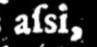

Predicted Text: ['']


In [20]:
image = Image.open("/content/train/assi.png")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

cv2_imshow(np.array(image))
print(f"Predicted Text: {predicted_text}")


Using word detector to segement words from image

In [21]:
!git clone https://github.com/githubharald/WordDetector.git
%cd WordDetector
!pip install .
from word_detector import prepare_img, detect, sort_multiline

Cloning into 'WordDetector'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 91 (delta 17), reused 18 (delta 15), pack-reused 66 (from 1)
Receiving objects: 100% (91/91), 2.33 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/WordDetector
Processing /content/WordDetector
  Preparing metadata (setup.py) ... done
  Created wheel for word-detector: filename=word_detector-1.0.0-py3-none-any.whl size=4244 sha256=3efcc16007658dbf3a5819147478bf184fa3cb2049e817e5e2f4c1cbf2767f2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-997mur9d/wheels/8d/25/ec/80402d1a5142376da407dc96c16412ba8b0ee15ed06b2ddea8
Successfully built word-detector


In [22]:
def extract_images(file_path):
    img = prepare_img(cv2.imread(file_path),3000)
    detections = detect(img,
                        kernel_size=25,
                        sigma=11,
                        theta=7,
                        min_area=1000)
    lines = sort_multiline(detections)
    list1 = []
    for i in lines:
      list2 = []
      for j in i:
        if(j.bbox.w*j.bbox.h<3000): continue
        # cv2_imshow(img[j.bbox.y:j.bbox.y+j.bbox.h,j.bbox.x:j.bbox.x+j.bbox.w])
        list2.append(img[j.bbox.y:j.bbox.y+j.bbox.h,j.bbox.x:j.bbox.x+j.bbox.w])
        # list2.append(j.bbox)
      list1.append(list2)

    return list1

First page of buendia transcription and its output produced by model

In [23]:
def extract_words(file_path, page_number):
    doc = Document(file_path)
    words_array = []

    for i in range(len(doc.paragraphs) - 1):
        current_text = doc.paragraphs[i].text.split('\n')
        if current_text[0] == (f"PDF p{page_number}"):
                # print(doc.paragraphs[i + 3].text.strip())
            while True:
                next_text = doc.paragraphs[i + 1].text.strip()
                if next_text == f"PDF p{page_number+1}":
                  break
                words_array+=(doc.paragraphs[i + 1].text.split('\n'))
                i += 1
                if i==len(doc.paragraphs)-1: break

    return words_array

file_path = "/content/humanai-task/Test transcriptions/Buendia transcription.docx"
result = extract_words(file_path, 1)
for i in result:
  print(i)


Al
INFINITAMENTE AMABLE
NIÑO JESUS.
A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-


In [24]:
images = extract_images('/content/data/1.1.png')
for imgline in images:
  for img in imgline:
    img = Image.fromarray(img)
    iter = img.convert("RGB")
    img = np.array(iter)
    # cv2_imshow(img)
    pixel_values = processor(img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
    # cv2_imshow(np.array(image))
    print(f"{predicted_text[0]}", end=' ')
  print('')

INI AMLE 
N     
   Del N 
 I  US d     In  
D   N 
 t   
C om N   D 
    P 
   N   
  t   la J 
   om  
      N 
 om  ax  
       
iino   Ara   
  N     
  Ara  
      OS  D 
no Eararar    V 
des   rovo    
